# Análise de Crescimento e Tendência do PIB 

* Importando Bibliotecas

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wbdata
from datetime import datetime

In [163]:
import warnings

warnings.filterwarnings('ignore')

* Selecionando o PIB como indicador

In [61]:
indicators = wbdata.get_indicators()
indicador = {'NY.GDP.MKTP.CD':'GDP (current U$$)'}

* Criando DataFrame com os dados de Brasil, EUA e China

In [62]:
data = wbdata.get_dataframe(indicador, country=['BR','US','CN'], date=(datetime(2000,1,1), datetime(2025,1,1)))
data = data.reset_index()
data

,country,date,GDP (current U$$)
0,Brazil,2023,2.173666e+12
1,Brazil,2022,1.951924e+12
2,Brazil,2021,1.670647e+12
3,Brazil,2020,1.476107e+12
4,Brazil,2019,1.873288e+12
...,...,...,...
67,United States,2004,1.221720e+13
68,United States,2003,1.145645e+13
69,United States,2002,1.092911e+13
70,United States,2001,1.058193e+13


* Criando arquivo CSV

In [67]:
data.to_csv('PIB.csv')

# Análise de Crescimento 

* Dividindo bases de dados por páis

In [185]:
brasil = data[data.country == 'Brazil']
usa = data[data.country == 'United States']
china = data[data.country == 'China']

* Sorteando datas em ordem crescente

In [186]:
brasil = brasil.sort_values(by='date')
usa = usa.sort_values(by='date')
china = china.sort_values(by='date')

* Visualização dos dados

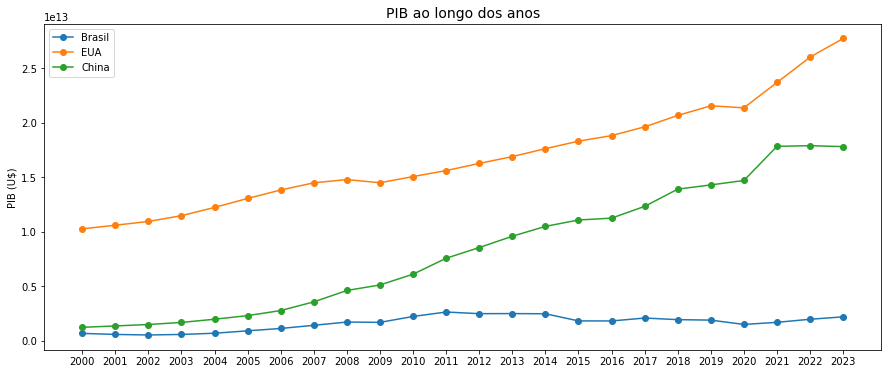

In [135]:
plt.figure(figsize=(15,6))
plt.plot(brasil['date'], brasil['GDP (current U$$)'], label='Brasil', marker='o')
plt.plot(usa['date'], usa['GDP (current U$$)'], label='EUA', marker='o')
plt.plot(china['date'], china['GDP (current U$$)'], label='China', marker='o')
plt.title('PIB ao longo dos anos', size=14)
plt.ylabel('PIB (U$)')
plt.legend()
plt.show()

# Brasil

* Tendência Brasil

In [136]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [187]:
brasil['date'] = pd.to_datetime(brasil['date'])
brasil = brasil.set_index('date')
brasil

,country,GDP (current U$$)
date,,
2000-01-01,Brazil,6.554482e+11
2001-01-01,Brazil,5.599836e+11
2002-01-01,Brazil,5.097953e+11
2003-01-01,Brazil,5.582337e+11
2004-01-01,Brazil,6.692894e+11
2005-01-01,Brazil,8.916338e+11
2006-01-01,Brazil,1.107627e+12
2007-01-01,Brazil,1.397114e+12
2008-01-01,Brazil,1.695855e+12


In [188]:
decomposicao_brasil = seasonal_decompose(brasil['GDP (current U$$)'])

In [189]:
tendencia_brasil = decomposicao_brasil.trend

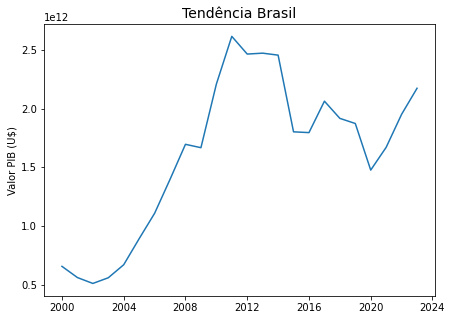

In [289]:
plt.figure(figsize=(7,5))
plt.plot(tendencia_brasil)
plt.title('Tendência Brasil', size=14)
plt.ylabel('Valor PIB (U$)')
plt.show()

* Previsão com Arima

In [254]:
from pmdarima.arima import auto_arima

In [255]:
len(brasil)

24

In [346]:
train = brasil['GDP (current U$$)'][:12]
test = brasil['GDP (current U$$)'][12:]

In [347]:
model = auto_arima(train, seasonal=False, suppress_warnings=True)

In [348]:
forecast = model.predict(n_periods=len(test))
predictions_br = pd.DataFrame(forecast, columns=['PIB_Predictions'])

In [349]:
predictions_br['Date'] = test.index
predictions_br.set_index('Date', inplace=True)

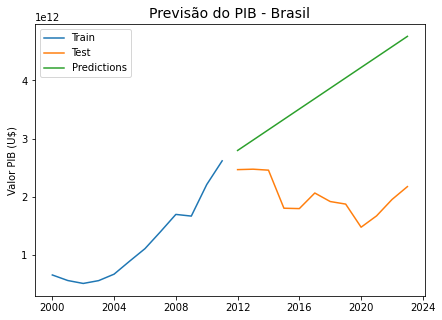

In [350]:
plt.figure(figsize=(7,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_br, label='Predictions')
plt.title('Previsão do PIB - Brasil', size=14)
plt.legend()
plt.ylabel('Valor PIB (U$)')
plt.show()

# Estados Unidos

* Tendência Estados Unidos

In [208]:
usa['date'] = pd.to_datetime(usa['date'])
usa = usa.set_index('date')
usa

,country,GDP (current U$$)
date,,
2000-01-01,United States,1.025095e+13
2001-01-01,United States,1.058193e+13
2002-01-01,United States,1.092911e+13
2003-01-01,United States,1.145645e+13
2004-01-01,United States,1.221720e+13
2005-01-01,United States,1.303920e+13
2006-01-01,United States,1.381558e+13
2007-01-01,United States,1.447423e+13
2008-01-01,United States,1.476986e+13


In [286]:
decomposicao_usa = seasonal_decompose(usa['GDP (current U$$)'])
tendencia_usa = decomposicao_usa.trend

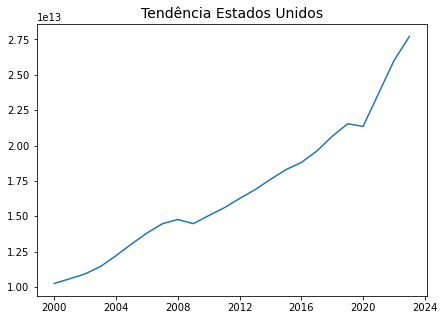

In [288]:
plt.figure(figsize=(7,5))
plt.plot(tendencia_usa)
plt.title('Tendência Estados Unidos', size=14)
plt.show()

In [212]:
len(usa)

24

In [341]:
train = usa['GDP (current U$$)'][:12]
test = usa['GDP (current U$$)'][12:]

In [342]:
model = auto_arima(train, seasonal=False, suppress_warnings=True)

In [343]:
forecast = model.predict(n_periods=len(test))
predictions_usa = pd.DataFrame(forecast, columns=['PIB_Predictions'])

In [344]:
predictions_usa['Date'] = test.index
predictions_usa.set_index('Date', inplace=True)

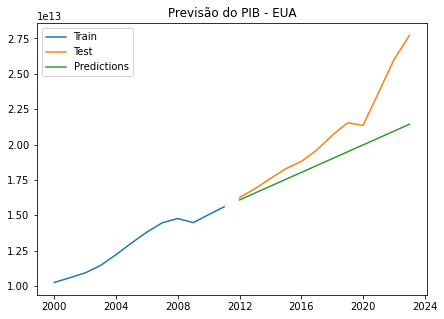

In [345]:
plt.figure(figsize=(7,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_usa, label='Predictions')
plt.title('Previsão do PIB - EUA')
plt.legend()
plt.show()

# China

In [220]:
china['date'] = pd.to_datetime(china['date'])
china = china.set_index('date')

In [221]:
decomposicao_china = seasonal_decompose(china['GDP (current U$$)'])
tendencia_china = decomposicao_china.trend

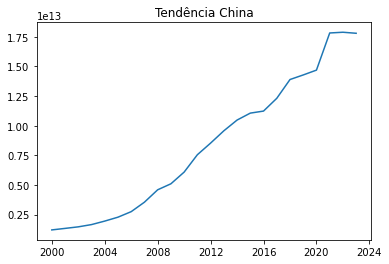

In [222]:
plt.plot(tendencia_china)
plt.title('Tendência China')
plt.show()

In [223]:
len(china)

24

In [351]:
train = china['GDP (current U$$)'][:12]
test = china['GDP (current U$$)'][12:]

In [352]:
model = auto_arima(train, seasonal=False, suppress_warnings=True)

In [353]:
forecast = model.predict(n_periods=len(test))
predictions_china = pd.DataFrame(forecast, columns=['PIB_Predictions'])

In [354]:
predictions_china['Date'] = test.index
predictions_china.set_index('Date', inplace=True)

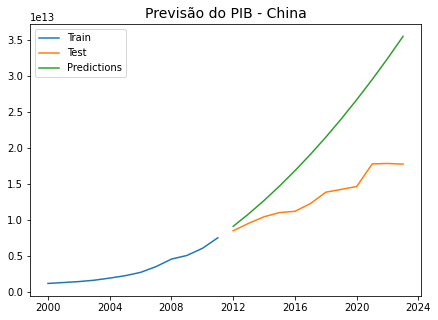

In [357]:
plt.figure(figsize=(7,5))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(predictions_china, label='Predictions')
plt.title('Previsão do PIB - China', size=14)
plt.legend()
plt.show()